### Revisión de la integridad de los datos Sector II

Esta zona presenta una particularidad muy útil para el análisis: es un sector netamente residencial, con barrios ensamblados (algunos ya habitados en el lugar, otros fueron construidos). Casi no existe presencia comercial y los terrenos, calles, aceras y espacios públicos son muy reducidos.

-----------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'delitos_csv/delitos_zona_ii_ubicacion.csv'
df = pd.read_csv(file_path, delimiter=',')

print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
      nombre  robo a mano armada  robo de vehiculos  robo piraña  \
0  denuncia1                   0                  0            0   
1  denuncia2                   0                  2            0   
2  denuncia3                   0                  1            0   
3  denuncia4                   0                  0            0   
4  denuncia5                   0                  0            0   

   lesiones leves  robo  lesiones graves  hurto  vandalismo       fecha  \
0               2     1                0      0           1  04/10/2010   
1               0     2                0      0           1  03/01/2020   
2               2     2                0      0           2  30/11/2012   
3               0     0                0      2           0  16/09/2011   
4               0     0                0      1           1  18/12/2011   

     latitud   longitud  
0 -31.441868 -64.243446  
1 -31.434455 -64.243225  
2 -31.437126 -64.245689  
3 -31.

In [2]:
nan_null_conteo = df.isnull().sum()
print("Conteo de valores NaN o null por columna:")
print(nan_null_conteo)

columnas_todo_cero = [col for col in df.columns if (df[col] == 0).all()]
print("\nColumnas con todos los valores en 0:")
print(columnas_todo_cero)

Conteo de valores NaN o null por columna:
nombre                0
robo a mano armada    0
robo de vehiculos     0
robo piraña           0
lesiones leves        0
robo                  0
lesiones graves       0
hurto                 0
vandalismo            0
fecha                 0
latitud               0
longitud              0
dtype: int64

Columnas con todos los valores en 0:
['robo a mano armada', 'robo piraña']


-----------------------------------------------------------------------------------------------------------------------

Como mencionamos previamente, *SI SE QUISIERA REVISAR LOS DATOS REALES* (los utilizados aquí están modificados por razones legales y a modo de ejemplo que replican la problemática), es importante evaluar si hay una totalidad de valores "0". Si nos referimos al sistema de carga de datos delictuales de algunas provincias argentinas, esto implicaría que erramos al consultar la fiscalía, UJ o el sistema policial de almacenamiento de datos.

-----------------------------------------------------------------------------------------------------------------------

In [3]:
columnas_a_excluir = ['nombre', 'fecha', 'latitud', 'longitud']
columnas_a_considerar = [col for col in df.columns if col not in columnas_a_excluir]

columnas_con_datos_no_cero = [col for col in columnas_a_considerar if (df[col] != 0).any()]

df_con_datos_no_cero = df[columnas_con_datos_no_cero]

estadisticas_descriptivas = df_con_datos_no_cero.describe(include='all')

print("\nEstadísticas descriptivas de las columnas con valores distintos de cero:")
print(estadisticas_descriptivas)


Estadísticas descriptivas de las columnas con valores distintos de cero:
       robo de vehiculos  lesiones leves        robo  lesiones graves  \
count         400.000000      400.000000  400.000000       400.000000   
mean            0.997500        1.057500    0.965000         0.985000   
std             0.814957        0.843191    0.806474         0.828548   
min             0.000000        0.000000    0.000000         0.000000   
25%             0.000000        0.000000    0.000000         0.000000   
50%             1.000000        1.000000    1.000000         1.000000   
75%             2.000000        2.000000    2.000000         2.000000   
max             2.000000        2.000000    2.000000         2.000000   

            hurto  vandalismo  
count  400.000000  400.000000  
mean     0.972500    0.922500  
std      0.814495    0.853413  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      1.000000    1.000000  
75%      2.000000    2.000000  
max      2.0

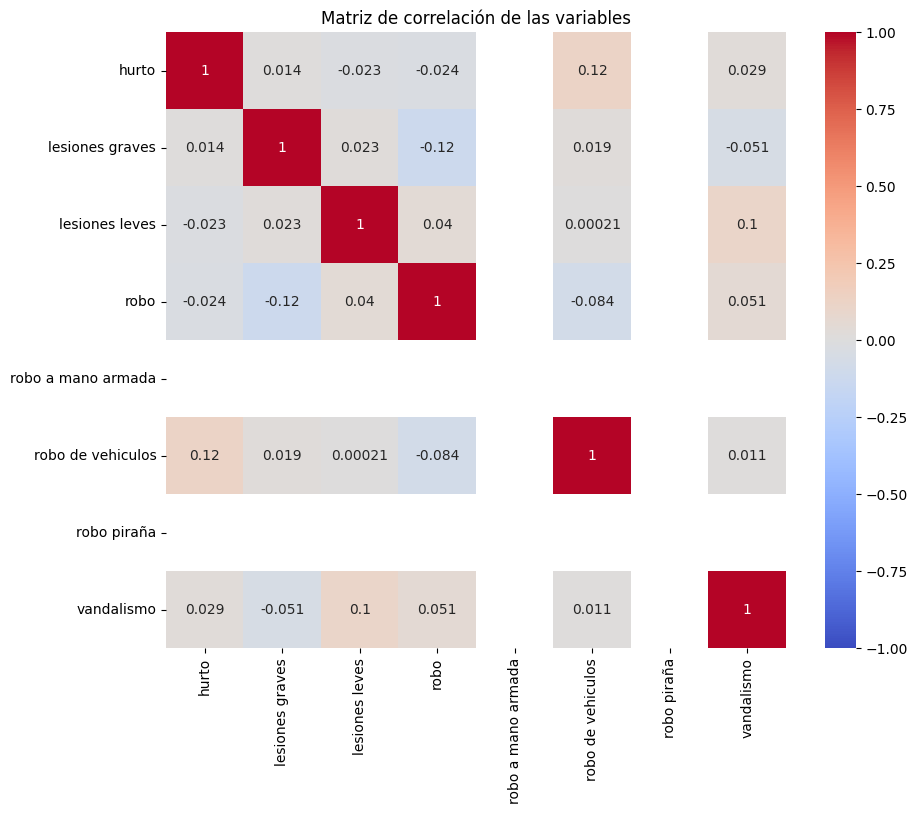

In [4]:
columnas_de_interes = df.columns.difference(['nombre', 'fecha', 'latitud', 'longitud'])
df_filtrado = df[columnas_de_interes]

matriz_de_correlacion = df_filtrado.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación de las variables')
plt.show()


-----------------------------------------------------------------------------------------------------------------------

### Aclaración:

Nuevamente observamos una falta de correlación, que para aquellos que no estén familiarizados con otras áreas de investigación, implicaría pasar por alto la relación entre los sucesos, el origen y el resultado del proyecto demográfico que generó este barrio.

-----------------------------------------------------------------------------------------------------------------------

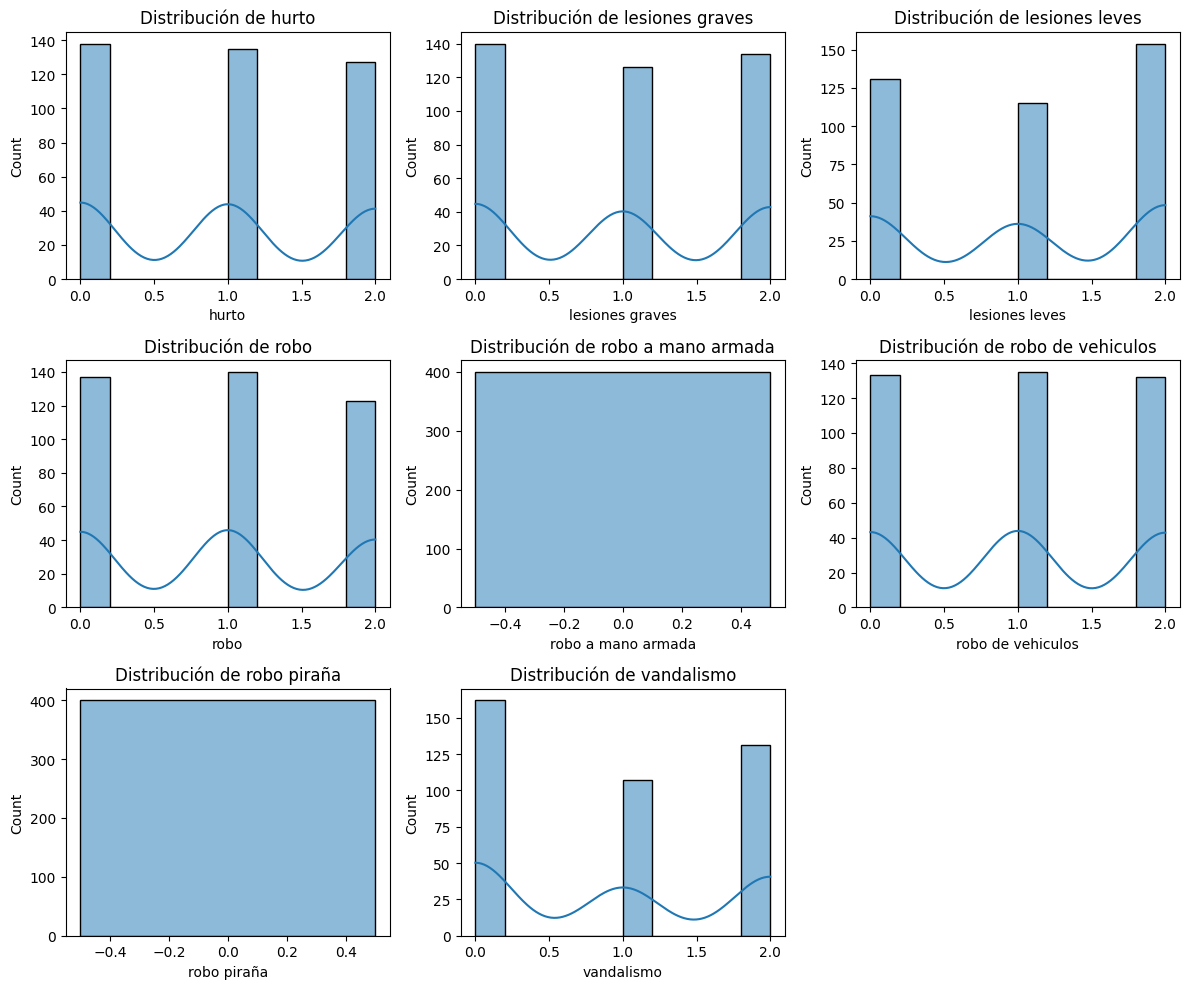

In [5]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(columnas_de_interes, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


-----------------------------------------------------------------------------------------------------------------------

Desafortunadamente, por razones legales, no puedo adjuntar los datos reales de fechas, geolocalización y delitos, los cuales fueron clave para revelar la problemática de la zona: el hacinamiento. Todo evento que propiciara la reunión de personas desencadenaba actos que atentaban contra la convivencia (aunque no fueran delitos registrados). Esto iniciaba una escalada en el conflicto que iba desde daños a la propiedad privada hasta conflictos físicos entre vecinos. Debido a la naturaleza del conflicto, no se registraban eventos como robos armados o ataques en grupo, ya que estos conflictos solían involucrar a familias colindantes a lo largo de un tiempo prolongado (años).

-----------------------------------------------------------------------------------------------------------------------

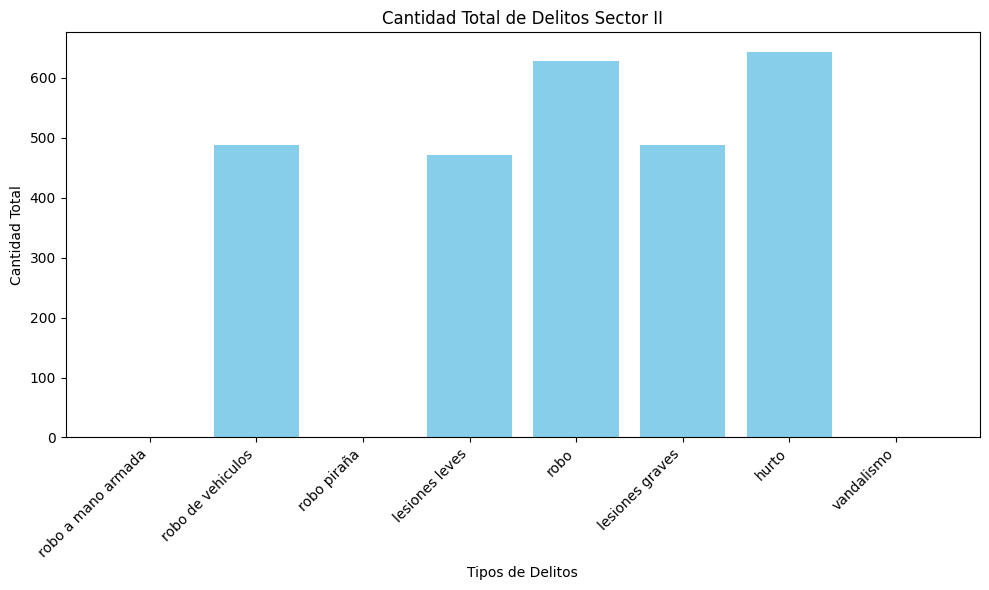

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("delitos_csv/delitos_zona_ii.csv")


sumas_delitos = df.iloc[:, 1:-1].sum()


nombres_delitos = df.columns[1:-1]


plt.figure(figsize=(10, 6))
plt.bar(nombres_delitos, sumas_delitos, color="skyblue")
plt.xlabel("Tipos de Delitos")
plt.ylabel("Cantidad Total")
plt.title("Cantidad Total de Delitos Sector II")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.show()

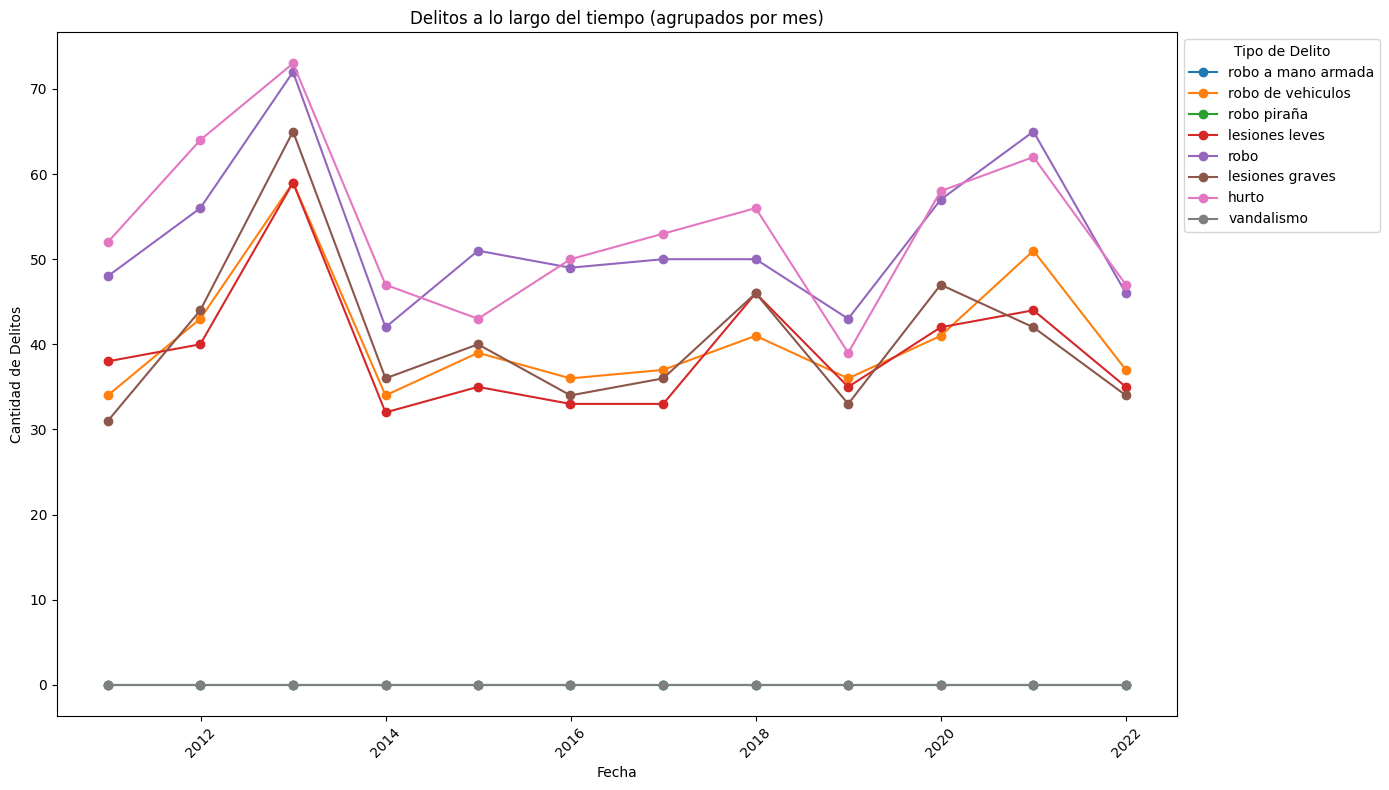

In [7]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')

df = df.drop(columns=['name'])

delitos_por_mes = df.groupby(pd.Grouper(key='fecha', freq='Y')).sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 8))

for columna in delitos_por_mes.columns[1:]:
    ax.plot(delitos_por_mes['fecha'], delitos_por_mes[columna], marker='o', label=columna)

ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de Delitos')
ax.set_title('Delitos a lo largo del tiempo (agrupados por mes)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Tipo de Delito')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

-----------------------------------------------------------------------------------------------------------------------

Algo muy característico de este tipo de problemáticas es que la presencia policial u otras estrategias externas al núcleo familiar son completamente inútiles. Se puede observar en el gráfico cómo todos los conflictos denunciados tienden a escalar, al igual que todos los hechos delictuales tienden a aumentar. Lo único que ha demostrado ser realmente efectivo es desarrollar mecanismos de interacción sana entre vecinos. No se conservan datos de enfriamiento o desescalada de conflictos, ya que una vez resuelto un conflicto, deja de ser relevante para el contexto de la seguridad ciudadana.

-----------------------------------------------------------------------------------------------------------------------